In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, chi2_contingency, f_oneway, levene, shapiro
from statsmodels.graphics.gofplots import qqplot
from statsmodels.formula.api import ols

# Load the dataset
data = pd.read_csv('yulu_bike_sharing_dataset.csv')

In [3]:
# Convert 'datetime' to a datetime object
data['datetime'] = pd.to_datetime(data['datetime'])

In [4]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB
None
                            datetime        season       holiday  \
count                          10886  10886.000000  10886.000000   
mean  

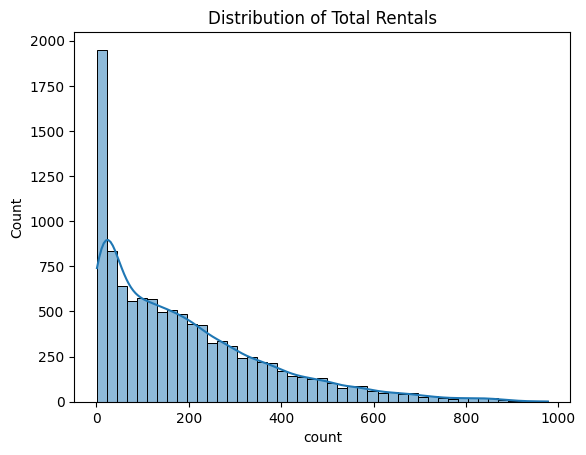

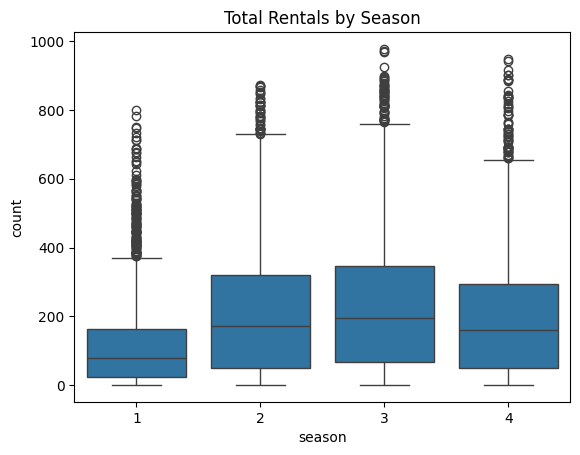

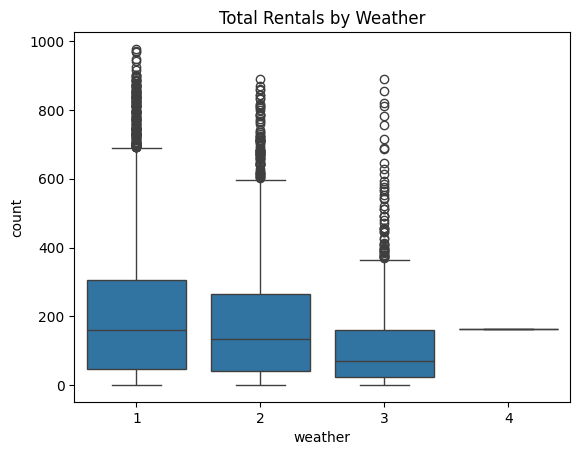

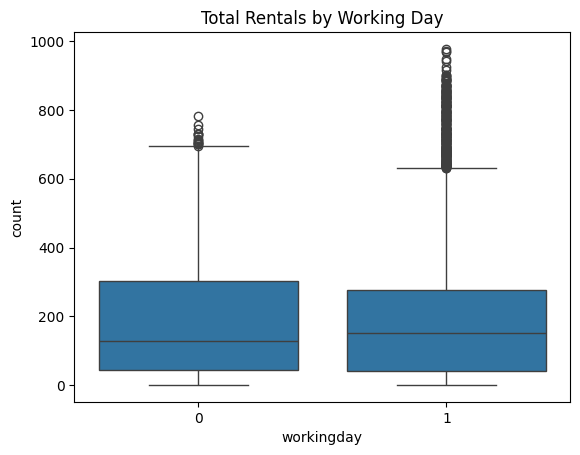

In [5]:
sns.histplot(data['count'], kde=True)
plt.title('Distribution of Total Rentals')
plt.show()

sns.boxplot(x='season', y='count', data=data)
plt.title('Total Rentals by Season')
plt.show()

sns.boxplot(x='weather', y='count', data=data)
plt.title('Total Rentals by Weather')
plt.show()

sns.boxplot(x='workingday', y='count', data=data)
plt.title('Total Rentals by Working Day')
plt.show()


In [6]:
workingday_rentals = data[data['workingday'] == 1]['count']
non_workingday_rentals = data[data['workingday'] == 0]['count']

t_stat, p_value = ttest_ind(workingday_rentals, non_workingday_rentals)
print('T-test between working day and non-working day rentals:')
print(f'T-statistic: {t_stat}, P-value: {p_value}')


T-test between working day and non-working day rentals:
T-statistic: 1.2096277376026694, P-value: 0.22644804226361348


In [7]:
anova_season = f_oneway(
    data[data['season'] == 1]['count'],
    data[data['season'] == 2]['count'],
    data[data['season'] == 3]['count'],
    data[data['season'] == 4]['count']
)
print('ANOVA test across seasons:')
print(f'F-statistic: {anova_season.statistic}, P-value: {anova_season.pvalue}')

ANOVA test across seasons:
F-statistic: 236.94671081032106, P-value: 6.164843386499654e-149


In [8]:
anova_weather = f_oneway(
    data[data['weather'] == 1]['count'],
    data[data['weather'] == 2]['count'],
    data[data['weather'] == 3]['count'],
    data[data['weather'] == 4]['count']
)
print('ANOVA test across weather conditions:')
print(f'F-statistic: {anova_weather.statistic}, P-value: {anova_weather.pvalue}')


ANOVA test across weather conditions:
F-statistic: 65.53024112793271, P-value: 5.482069475935669e-42


In [9]:
weather_season_table = pd.crosstab(data['weather'], data['season'])
chi2_stat, p_value, dof, ex = chi2_contingency(weather_season_table)
print('Chi-square test between weather and season:')
print(f'Chi-square Statistic: {chi2_stat}, P-value: {p_value}')

Chi-square test between weather and season:
Chi-square Statistic: 49.15865559689363, P-value: 1.5499250736864862e-07


In [10]:
levene_stat, levene_p = levene(
    data[data['season'] == 1]['count'],
    data[data['season'] == 2]['count'],
    data[data['season'] == 3]['count'],
    data[data['season'] == 4]['count']
)
print('Levene’s Test for equal variance across seasons:')
print(f'Levene Statistic: {levene_stat}, P-value: {levene_p}')


Levene’s Test for equal variance across seasons:
Levene Statistic: 187.7706624026276, P-value: 1.0147116860043298e-118


In [11]:
shapiro_stat, shapiro_p = shapiro(data['count'])
print('Shapiro-Wilk Test for normality:')
print(f'Statistic: {shapiro_stat}, P-value: {shapiro_p}')


Shapiro-Wilk Test for normality:
Statistic: 0.8783658962690556, P-value: 5.369837893115507e-68


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10886.
  res = hypotest_fun_out(*samples, **kwds)


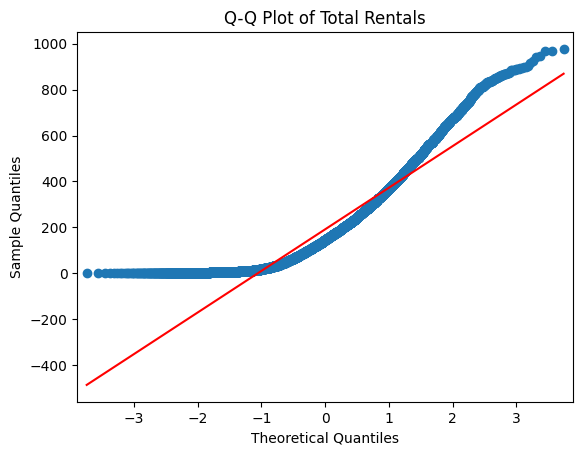

In [12]:
qqplot(data['count'], line='s')
plt.title('Q-Q Plot of Total Rentals')
plt.show()


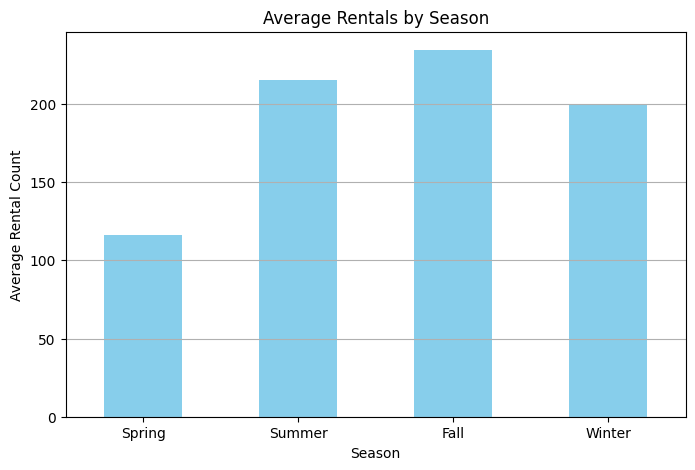

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Grouping data by season and calculating average rentals
seasonal_data = data.groupby('season')['count'].mean()

# Plotting average rentals by season
plt.figure(figsize=(8, 5))
seasonal_data.plot(kind='bar', color='skyblue')
plt.title('Average Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Average Rental Count')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'], rotation=0)
plt.grid(axis='y')
plt.show()


<ipython-input-15-35865bb67667>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_data.index, y=weather_data.values, palette='viridis')


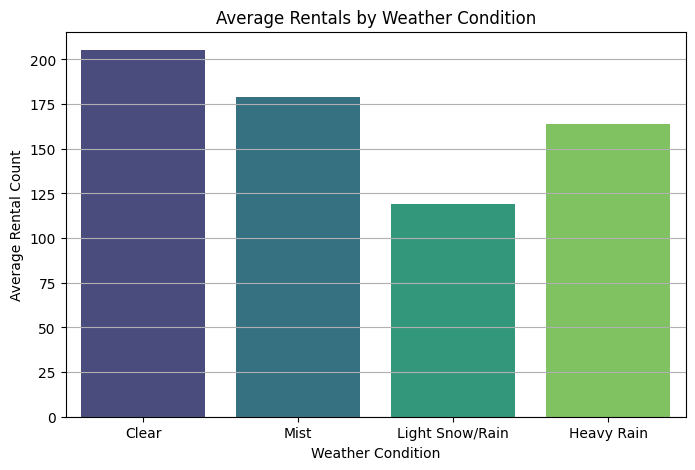

In [15]:
import seaborn as sns

# Grouping data by weather condition and calculating average rentals
weather_data = data.groupby('weather')['count'].mean()

# Plotting average rentals by weather condition
plt.figure(figsize=(8, 5))
sns.barplot(x=weather_data.index, y=weather_data.values, palette='viridis')
plt.title('Average Rentals by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Average Rental Count')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Clear', 'Mist', 'Light Snow/Rain', 'Heavy Rain'], rotation=0)
plt.grid(axis='y')
plt.show()


In [16]:
# Adding a new column for dynamic pricing based on demand
def dynamic_pricing(count):
    if count > data['count'].quantile(0.75):
        return 'High'
    elif count < data['count'].quantile(0.25):
        return 'Low'
    else:
        return 'Medium'

data['pricing_strategy'] = data['count'].apply(dynamic_pricing)

# Displaying the first few rows with the new pricing strategy column
data[['datetime', 'count', 'pricing_strategy']].head()


,datetime,count,pricing_strategy
0,2011-01-01 00:00:00,16,Low
1,2011-01-01 01:00:00,40,Low
2,2011-01-01 02:00:00,32,Low
3,2011-01-01 03:00:00,13,Low
4,2011-01-01 04:00:00,1,Low


from matplotlib import pyplot as plt
_df_0['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('count')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['datetime']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'datetime'}, axis=1)
              .sort_values('datetime', ascending=True))
  xs = counted['datetime']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('count')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['datetime']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'datetime'}, axis=1)
              .sort_values('datetime', ascending=True))
  xs = counted['datetime']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

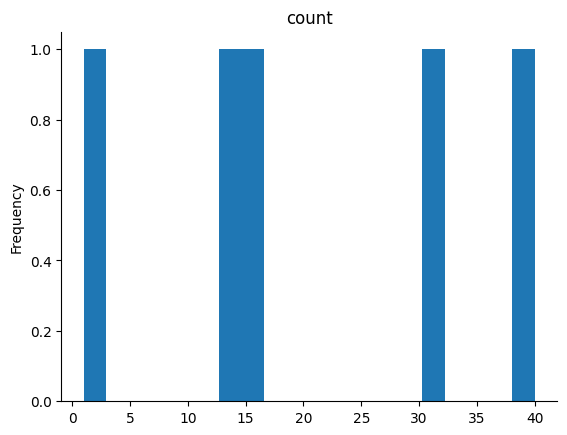

In [17]:
from matplotlib import pyplot as plt
_df_0['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

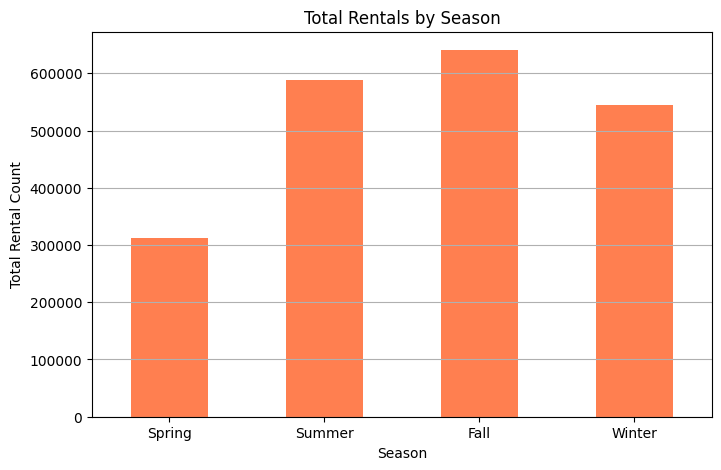

In [18]:
# Grouping by season and counting total rentals
fleet_management_data = data.groupby('season')['count'].sum()

# Plotting total rentals by season
plt.figure(figsize=(8, 5))
fleet_management_data.plot(kind='bar', color='coral')
plt.title('Total Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Total Rental Count')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'], rotation=0)
plt.grid(axis='y')
plt.show()


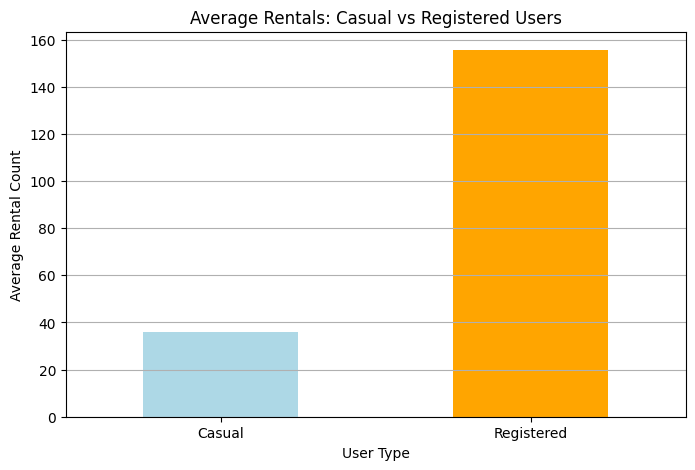

In [19]:
# Calculating average rentals for casual and registered users
user_segmentation = data[['casual', 'registered']].mean()

# Plotting average rentals for casual and registered users
plt.figure(figsize=(8, 5))
user_segmentation.plot(kind='bar', color=['lightblue', 'orange'])
plt.title('Average Rentals: Casual vs Registered Users')
plt.xlabel('User Type')
plt.ylabel('Average Rental Count')
plt.xticks(ticks=[0, 1], labels=['Casual', 'Registered'], rotation=0)
plt.grid(axis='y')
plt.show()


<ipython-input-23-a325576c6b1e>:18: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_data.fillna(method='ffill', inplace=True)


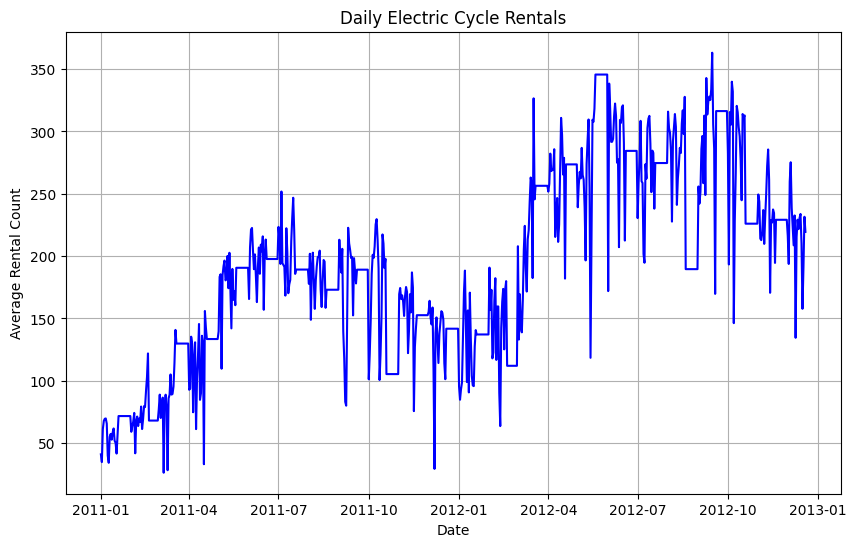

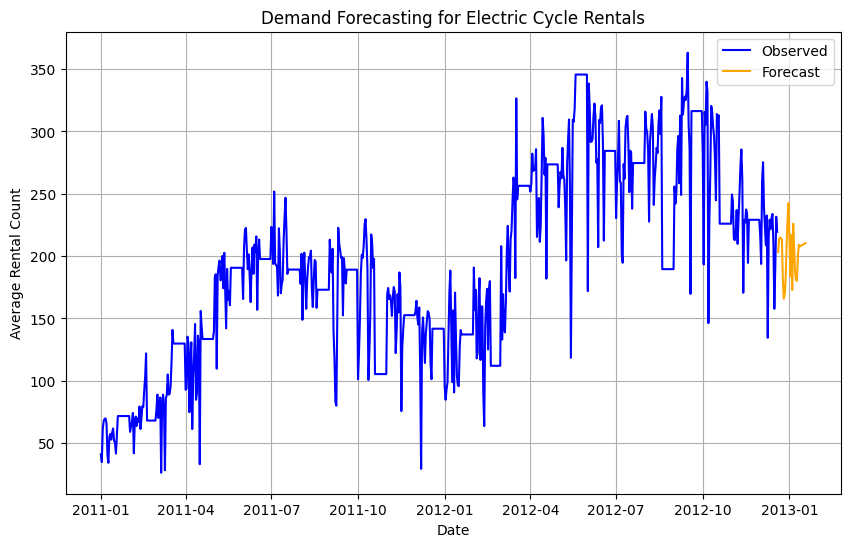

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the dataset
data = pd.read_csv('yulu_bike_sharing_dataset.csv')

# Convert 'datetime' column to pandas datetime format
data['datetime'] = pd.to_datetime(data['datetime'])

# Set 'datetime' as the index
data.set_index('datetime', inplace=True)

# Resample the data to daily frequency and calculate the average count
daily_data = data['count'].resample('D').mean()

# Fill any missing values with forward fill
daily_data.fillna(method='ffill', inplace=True)

# Plot the historical data
plt.figure(figsize=(10, 6))
plt.plot(daily_data, label='Observed', color='blue')
plt.title('Daily Electric Cycle Rentals')
plt.xlabel('Date')
plt.ylabel('Average Rental Count')
plt.grid(True)
plt.show()

# Apply Exponential Smoothing
# If daily_data has less than 730 observations, reduce seasonal_periods
seasonal_periods = 365 if len(daily_data) >= 730 else len(daily_data) // 2 #adjust seasonal_periods if data is not enough
# Initialize the model with the adjusted or original seasonal_periods
model = ExponentialSmoothing(daily_data, trend='add', seasonal='add', seasonal_periods=seasonal_periods)
fit_model = model.fit()


# Forecasting for the next 30 days
forecast = fit_model.forecast(steps=30)

# Plot the forecasted data
plt.figure(figsize=(10, 6))
plt.plot(daily_data, label='Observed', color='blue')
plt.plot(forecast, label='Forecast', color='orange')
plt.title('Demand Forecasting for Electric Cycle Rentals')
plt.xlabel('Date')
plt.ylabel('Average Rental Count')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv('yulu_bike_sharing_dataset.csv')

# Convert 'datetime' to pandas datetime format and extract features
data['datetime'] = pd.to_datetime(data['datetime'])
data['hour'] = data['datetime'].dt.hour
data['day'] = data['datetime'].dt.day
data['month'] = data['datetime'].dt.month
data['year'] = data['datetime'].dt.year
data['weekday'] = data['datetime'].dt.weekday

# Define peak demand as hours with count above a threshold
threshold = data['count'].mean() + data['count'].std()
data['peak_demand'] = (data['count'] > threshold).astype(int)

# Features and target variable
features = ['hour', 'day', 'month', 'year', 'weekday', 'temp', 'humidity', 'windspeed', 'holiday', 'workingday', 'weather']
X = data[features]
y = data['peak_demand']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1838
           1       0.93      0.84      0.88       340

    accuracy                           0.96      2178
   macro avg       0.95      0.91      0.93      2178
weighted avg       0.96      0.96      0.96      2178

Confusion Matrix:
 [[1817   21]
 [  56  284]]


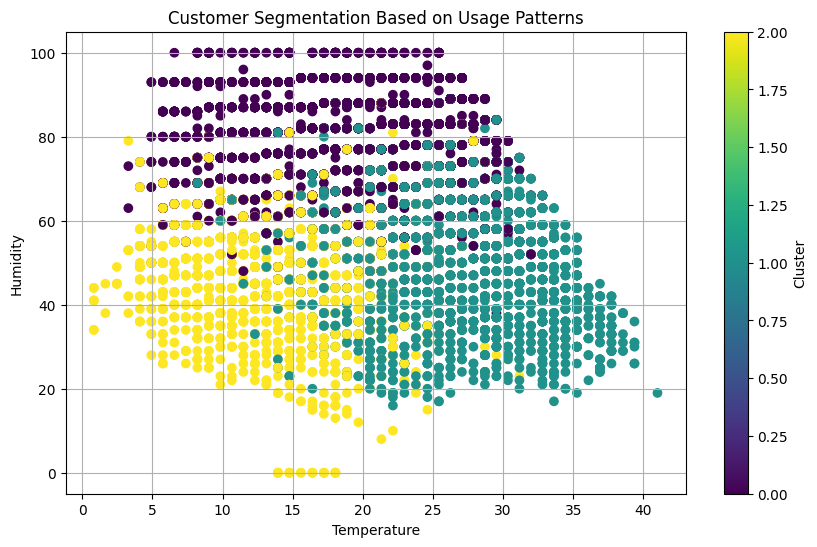

In [25]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features related to user behavior
user_features = data[['casual', 'registered', 'temp', 'humidity', 'windspeed']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(user_features)

# Apply KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_features)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['temp'], data['humidity'], c=data['cluster'], cmap='viridis')
plt.title('Customer Segmentation Based on Usage Patterns')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

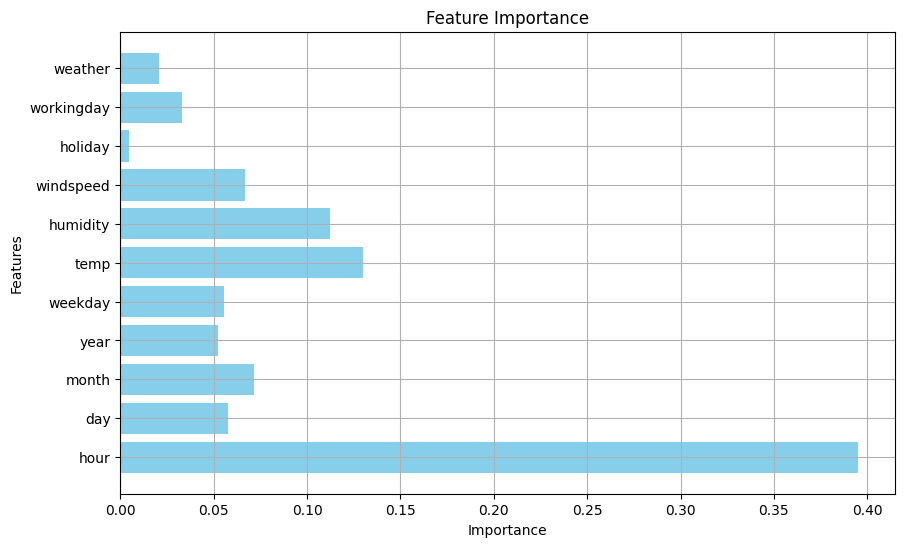

In [26]:
importances = clf.feature_importances_
feature_names = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.grid(True)
plt.show()


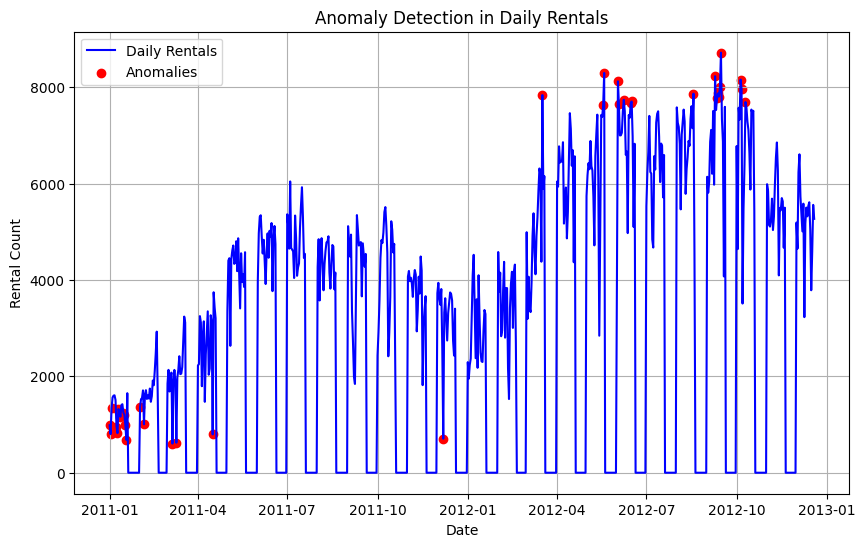

In [28]:
from sklearn.ensemble import IsolationForest

# Use daily rental count for anomaly detection
# Reset the index to make 'datetime' a regular column again
daily_rentals = data.reset_index().resample('D', on='datetime')['count'].sum().reset_index()


# Fit Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination=0.05, random_state=42)
daily_rentals['anomaly'] = iso_forest.fit_predict(daily_rentals[['count']])

# Visualize anomalies
plt.figure(figsize=(10, 6))
plt.plot(daily_rentals['datetime'], daily_rentals['count'], label='Daily Rentals', color='blue')
plt.scatter(daily_rentals['datetime'][daily_rentals['anomaly'] == -1], daily_rentals['count'][daily_rentals['anomaly'] == -1], color='red', label='Anomalies')
plt.title('Anomaly Detection in Daily Rentals')
plt.xlabel('Date')
plt.ylabel('Rental Count')
plt.legend()
plt.grid(True)
plt.show()

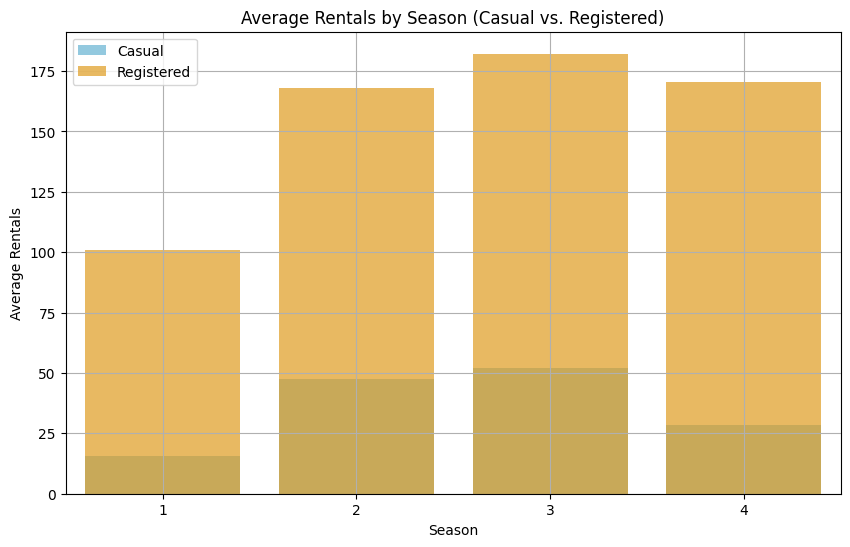

In [29]:
import seaborn as sns

# Group data by season and user type
seasonal_data = data.groupby(['season'])[['casual', 'registered']].mean().reset_index()

# Plotting seasonal impact
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='casual', data=seasonal_data, color='skyblue', label='Casual')
sns.barplot(x='season', y='registered', data=seasonal_data, color='orange', label='Registered', alpha=0.7)
plt.title('Average Rentals by Season (Casual vs. Registered)')
plt.xlabel('Season')
plt.ylabel('Average Rentals')
plt.legend()
plt.grid(True)
plt.show()


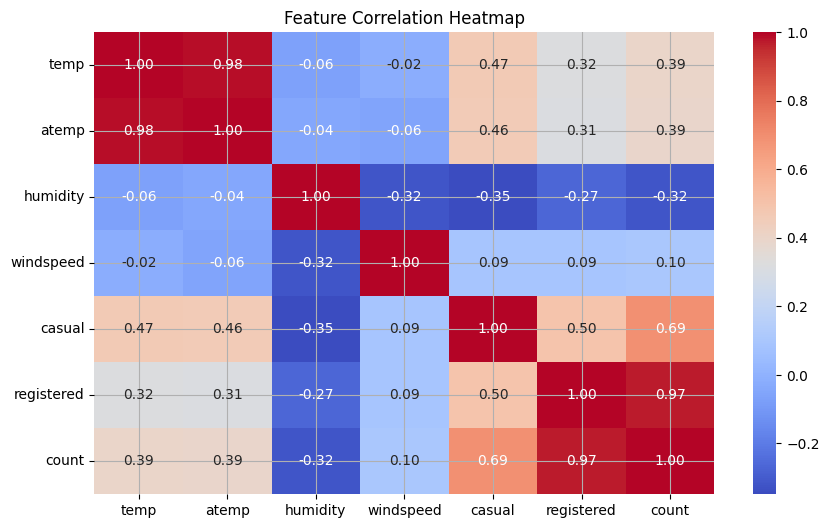

In [30]:
# Calculate correlation matrix
corr_matrix = data[['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']].corr()

# Plotting correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.grid(True)
plt.show()


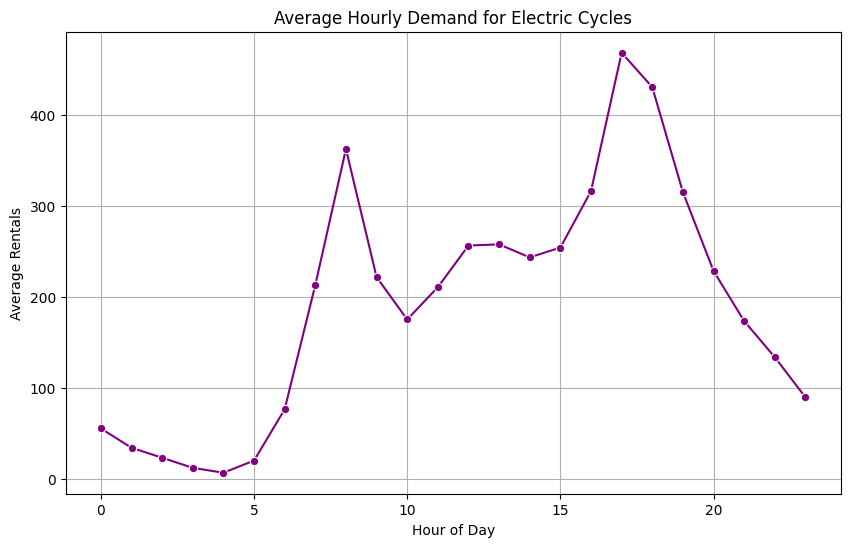

In [31]:
# Group data by hour to get average demand
hourly_data = data.groupby('hour')['count'].mean().reset_index()

# Plot hourly demand pattern
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='count', data=hourly_data, marker='o', color='purple')
plt.title('Average Hourly Demand for Electric Cycles')
plt.xlabel('Hour of Day')
plt.ylabel('Average Rentals')
plt.grid(True)
plt.show()


<ipython-input-32-c3c6fd52adcd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weather', y='count', data=weather_data, palette='Blues_d')


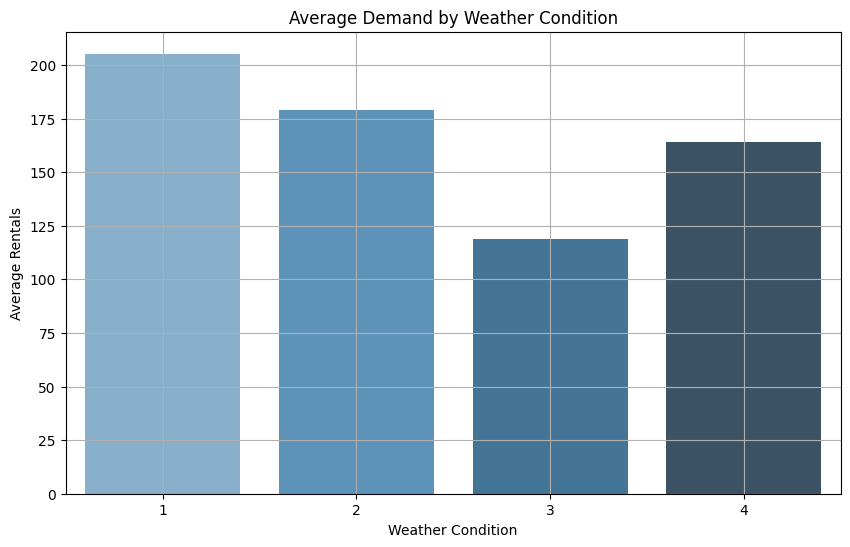

In [32]:
# Group data by weather condition
weather_data = data.groupby('weather')['count'].mean().reset_index()

# Plotting impact of weather on demand
plt.figure(figsize=(10, 6))
sns.barplot(x='weather', y='count', data=weather_data, palette='Blues_d')
plt.title('Average Demand by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Average Rentals')
plt.grid(True)
plt.show()


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Features and target
X = data[['temp', 'humidity', 'windspeed', 'holiday', 'workingday', 'season', 'weather']]
y = data['count']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions
y_pred = linear_model.predict(X_test)

# Evaluate the model
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R-squared: {r2_score(y_test, y_pred)}')


Mean Squared Error: 23963.21940911104
R-squared: 0.27399442628981807


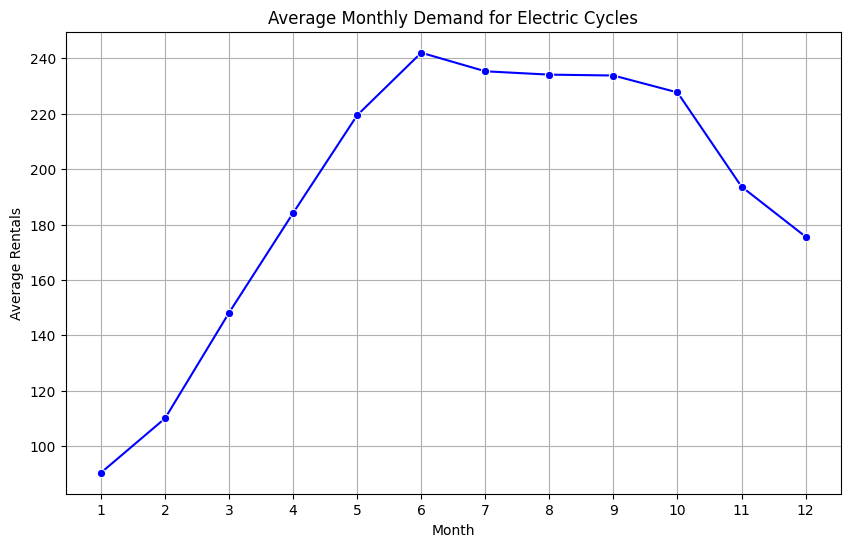

In [34]:
# Extract month from datetime and group by month to get average demand
data['month'] = data['datetime'].dt.month
monthly_data = data.groupby('month')['count'].mean().reset_index()

# Plotting monthly demand pattern
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='count', data=monthly_data, marker='o', color='blue')
plt.title('Average Monthly Demand for Electric Cycles')
plt.xlabel('Month')
plt.ylabel('Average Rentals')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()


<ipython-input-36-b0da413fe9e0>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weekday', y='count', data=weekday_data, palette='pastel')


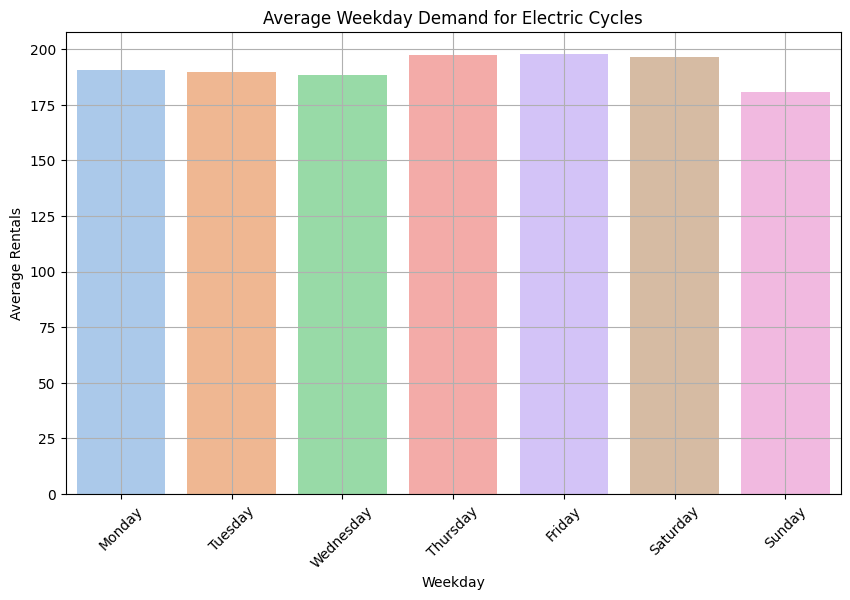

In [36]:
# Extract weekday from datetime and group by weekday to get average demand
data['weekday'] = data['datetime'].dt.weekday
weekday_data = data.groupby('weekday')['count'].mean().reset_index()

# Map weekdays to their names
weekday_data['weekday'] = weekday_data['weekday'].map({
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
    4: 'Friday', 5: 'Saturday', 6: 'Sunday'
})

# Plotting weekday demand pattern
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday', y='count', data=weekday_data, palette='pastel')
plt.title('Average Weekday Demand for Electric Cycles')
plt.xlabel('Weekday')
plt.ylabel('Average Rentals')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


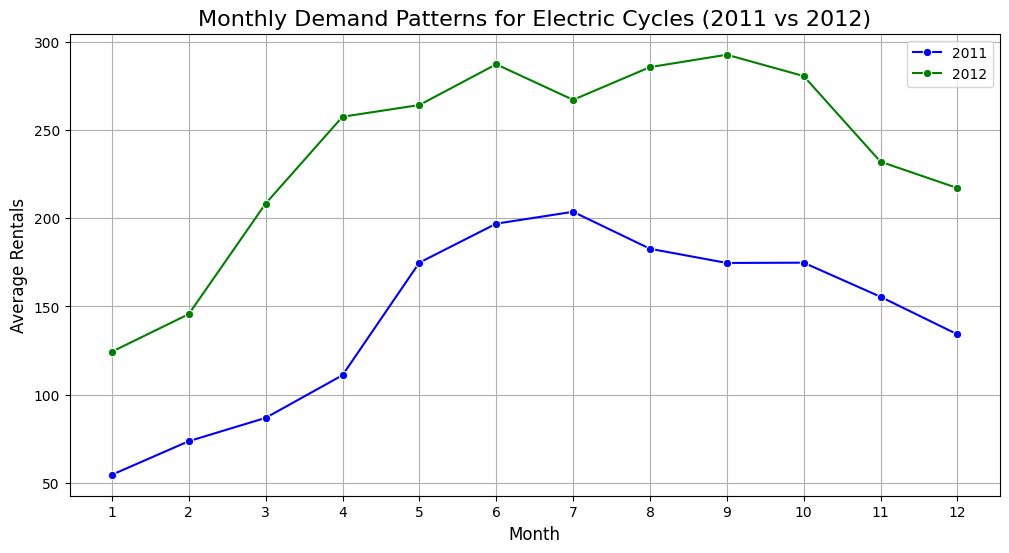

In [37]:
# Extract year from datetime
data['year'] = data['datetime'].dt.year

# Filter data for the years 2011 and 2012
data_2011 = data[data['year'] == 2011]
data_2012 = data[data['year'] == 2012]

# Group by month and calculate the average count for each year
monthly_2011 = data_2011.groupby(data_2011['datetime'].dt.month)['count'].mean().reset_index(name='count_2011')
monthly_2012 = data_2012.groupby(data_2012['datetime'].dt.month)['count'].mean().reset_index(name='count_2012')

# Merging both years' data on month
monthly_comparison = pd.merge(monthly_2011, monthly_2012, left_on='datetime', right_on='datetime', suffixes=('_2011', '_2012'))

# Plotting the comparison
plt.figure(figsize=(12, 6))
sns.lineplot(x='datetime', y='count_2011', data=monthly_comparison, marker='o', label='2011', color='blue')
sns.lineplot(x='datetime', y='count_2012', data=monthly_comparison, marker='o', label='2012', color='green')
plt.title('Monthly Demand Patterns for Electric Cycles (2011 vs 2012)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Rentals', fontsize=12)
plt.xticks(range(1, 13))
plt.legend()
plt.grid(True)
plt.show()


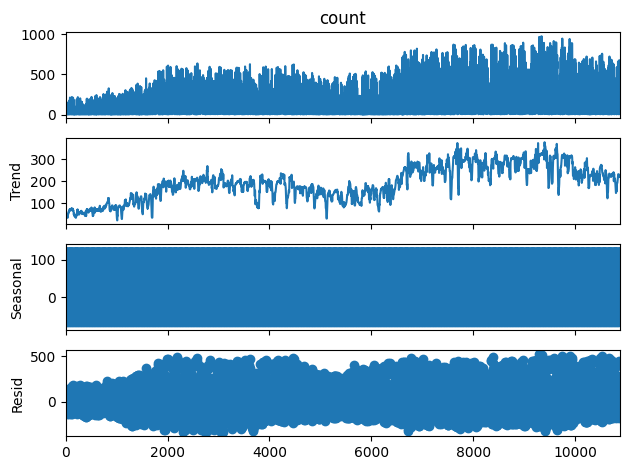

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposing the time series
decomposition = seasonal_decompose(data['count'], model='additive', period=24)
decomposition.plot()
plt.show()


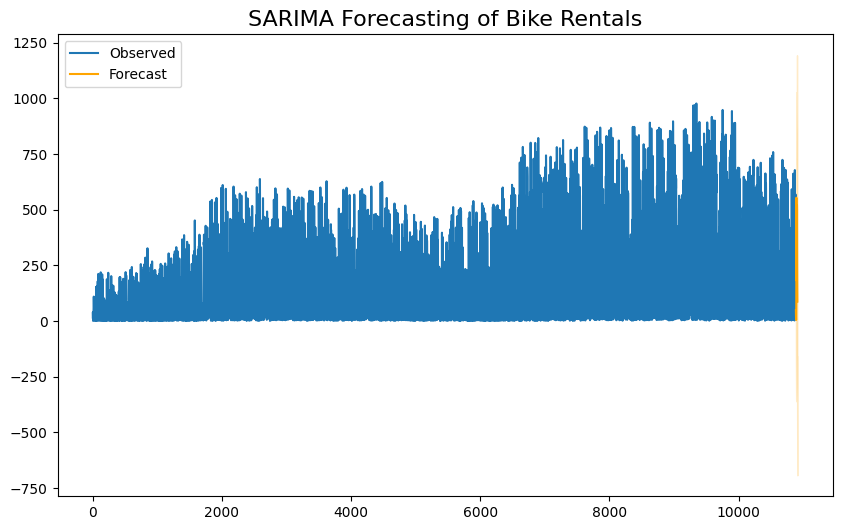

In [39]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# SARIMA model fitting
sarima_model = SARIMAX(data['count'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))
sarima_result = sarima_model.fit()

# Forecasting
sarima_forecast = sarima_result.get_forecast(steps=24)
forecast_ci = sarima_forecast.conf_int()

plt.figure(figsize=(10, 6))
plt.plot(data['count'], label='Observed')
plt.plot(sarima_forecast.predicted_mean, label='Forecast', color='orange')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='orange', alpha=0.2)
plt.title('SARIMA Forecasting of Bike Rentals', fontsize=16)
plt.legend()
plt.show()


In [41]:
from keras.models import Sequential
from keras.layers import Dense

# Neural network model
nn_model = Sequential()
nn_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1))

# Compile and fit the model
nn_model.compile(optimizer='adam', loss='mean_squared_error')
nn_model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1)

# Predictions
nn_predictions = nn_model.predict(X_test)
nn_mse = mean_squared_error(y_test, nn_predictions)
nn_r2 = r2_score(y_test, nn_predictions)

print(f'Neural Network MSE: {nn_mse:.2f}')
print(f'Neural Network R2: {nn_r2:.2f}')



Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


871/871 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 35377.5312
Epoch 2/50
871/871 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 24830.1211
Epoch 3/50
871/871 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 24565.9238
Epoch 4/50
871/871 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 24812.4746
Epoch 5/50
871/871 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 24370.5156
Epoch 6/50
871/871 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 24452.9062
Epoch 7/50
871/871 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 24256.0762
Epoch 8/50
871/871 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 24238.7656
Epoch 9/50
871/871 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 24399.5898
Epoch 10/50
871/871 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 24161.1680
Epoch 11/50
871/871 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 23523.4922
Epoch 12/50
871/871 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 24202.6719
Epoch 13/50
871/871 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 24104.9512
Epoch 14/50
871/871 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 24388.2480
Epoch 15/50
